In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

from simulator.HamiltonianOperator import *
from simulator.PulseSequence import PulseSequence
from simulator.Pulse import Pulse

# GATES

`Pulse` class is an interface that computes the unitary, by exponentiating the given operator with relevant phase. Here is the code snippet.

```python
    def apply(self):
        return (-1j* self._phase * self._op).expm()
```

## One qubit X

In [3]:
X_i = Pulse("Ix(pi)", Ix, np.pi)
print("Applying X gate to 1H, upto global phase")
np.exp(+1j*np.pi)*X_i.apply()

Applying X gate to 1H, upto global phase


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]]

Text(0.5, 1.0, 'C-Spectrum')

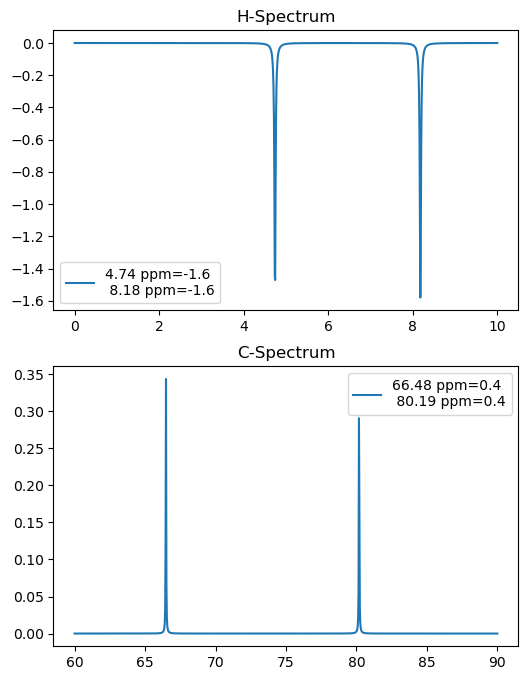

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(6,8))
X_i.compile().evolve_pho_th().plot_h_spectrum(ax[0])
ax[0].set_title("H-Spectrum")
X_i.compile().evolve_pho_th().plot_c_spectrum(ax[1])
ax[1].set_title("C-Spectrum")

## One qubit Hadamard

#### Pseudo Hadamards

In [5]:
pH_i = Pulse("Iy(-pi/2)", Iy, -np.pi/2)
print(f"Pseudo pH_i operator")
pH_i.apply()

Pseudo pH_i operator


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [-0.70710678  0.          0.70710678  0.        ]
 [ 0.         -0.70710678  0.          0.70710678]]

Text(0.5, 0.98, 'Psedo H_i spectrum')

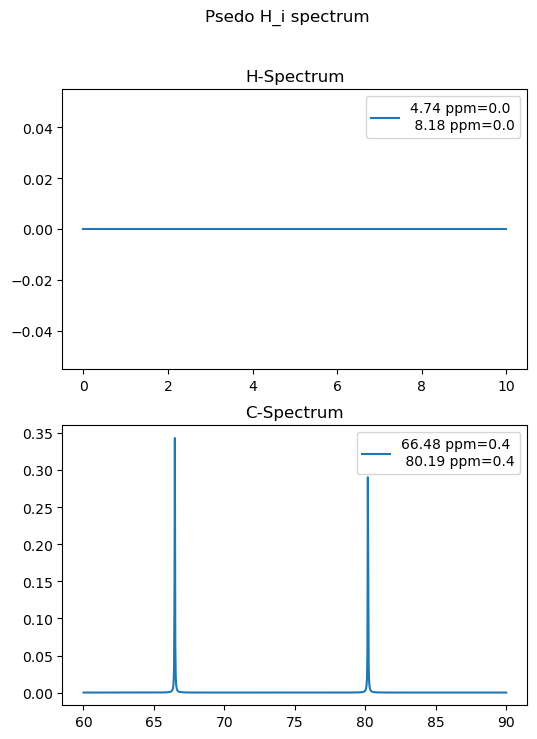

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(6,8))
pH_i.compile().evolve_pho_th().plot_h_spectrum(ax[0])
ax[0].set_title("H-Spectrum")
pH_i.compile().evolve_pho_th().plot_c_spectrum(ax[1])
ax[1].set_title("C-Spectrum")
fig.suptitle("Psedo H_i spectrum")

## Applying Iz Pulses in NMR
We cant apply an Iz pulse directly in NMR. So, we use the following relation:
$R_z(\pi/2) = R_x(-\pi/2).R_y(\pi/2).R_x(\pi/2)$ 

In [7]:
def Iz_pulse(theta):
    return PulseSequence("Iz(theta)")\
        .add(Pulse("Ix(-pi/2)", Ix, -np.pi/2))\
        .add(Pulse(f"Iy({theta/np.pi}*pi)", Iy, theta))\
        .add(Pulse("Ix(pi/2)", Ix, np.pi/2))

def Sz_pulse(theta):
    return PulseSequence("Sz(theta)")\
        .add(Pulse("Sx(-pi/2)", Sx, -np.pi/2))\
        .add(Pulse(f"Sy({theta/np.pi}*pi)", Sy, theta))\
        .add(Pulse("Sx(pi/2)", Sx, np.pi/2))

In [8]:
Iz_pulse(np.pi/2).compile().get_operator()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678-0.70710678j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678+0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.70710678+0.70710678j]]

In [9]:
Iz = 0.5*qt.tensor(qt.sigmaz(), qt.sigmaz())
(-1j*np.pi/2*Iz).expm()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678-0.70710678j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678+0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.70710678-0.70710678j]]

Verified that $I_x(-\pi/2).I_y(+\pi/2).I_x(+\pi/2) = I_z(+\pi/2)$ 

# Applying $I_zS_z$ pulses in NMR
- Apply a delay of (1/2J) to implement (+2IzSz) operator.
- Apply a delay of (3/2J) to implement (-2IzSz) operator.

In [10]:
Pulse("delay(1/2J)", IzSz, np.pi).apply()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678-0.70710678j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678+0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.70710678-0.70710678j]]

In [11]:
Pulse("delay(3/2J)", IzSz, -np.pi).apply()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678+0.70710678j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678-0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.70710678+0.70710678j]]

### `PulseSequence` class for creating gates with multiple sequences

`PulseSequence` class 

```python
    def __init__(self, name) -> None:
        self.reset()
        self._name = name

    def reset(self) -> None:
        I = qt.identity(2)
        self._seq = []
        self._op = qt.tensor(I,I)
        self._name = ""
```

It computes the unitary whenever I add a pulse/pulse sequence. It does so by multiplying the unitary of the new pulse / pulse sequence with the existing unitary of the sequence.  `PulseSequence("Example").add(p1).add(p2).add(p3)` will compute the unitary by multiplying the unitaries in the reverse order `U3*U2*U1`.  

```python
    def add(self, pulse: Pulse)->PulseSequence:
            self._seq.append(pulse.name)
            self._op = pulse.apply() * self._op
            return self
    
    def add_seq(self, seq1: PulseSequence)->PulseSequence:
        self._seq.extend(seq1._seq)
        self._op = seq1._op * self._op
        return self
```

Finally, I have a function for printing the resulting pulse sequence.  

```python
def print_sequence(self) -> None:
        print(f"{self._name} Pulse Sequence: {' -> '.join(self._seq)}", end="")
```

## Real Hadamards

In [12]:
aH_i = PulseSequence("Actual H_i")\
        .add(Pulse("Iy(+pi/2)", Iy, +np.pi/2))\
        .add(Pulse("Ix(+pi/2)", Ix, +np.pi))\

print(f"Actual H_i operator upto global phase")
np.exp(1j*np.pi/2)*aH_i.compile().get_operator()

Actual H_i operator upto global phase


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]
 [ 0.          0.70710678  0.         -0.70710678]]

Text(0.5, 0.98, 'Actual H_i spectrum')

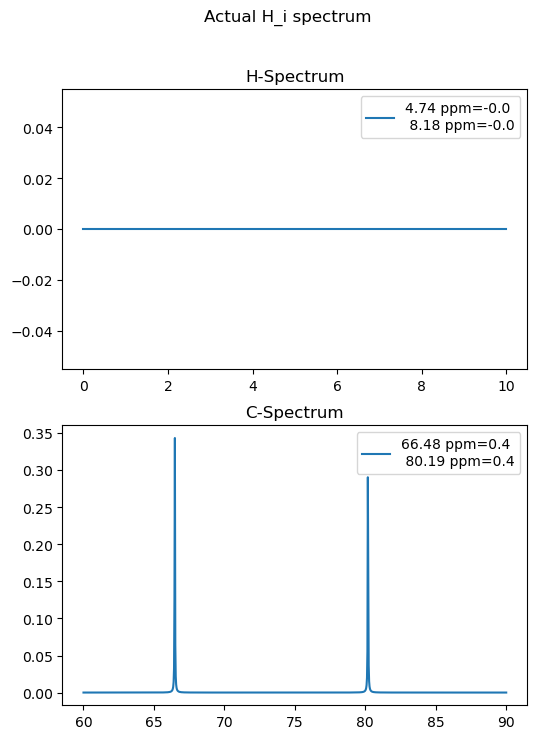

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(6,8))
aH_i.compile().evolve_pho_th().plot_h_spectrum(ax[0])
ax[0].set_title("H-Spectrum")
aH_i.compile().evolve_pho_th().plot_c_spectrum(ax[1])
ax[1].set_title("C-Spectrum")
fig.suptitle("Actual H_i spectrum")

### Part C: Two Qubit Controlled Z

In [14]:
cz = PulseSequence("CZ")\
    .add_seq(Iz_pulse(np.pi/2))\
    .add_seq(Sz_pulse(np.pi/2))\
    .add(Pulse("-2IzSz(aka delay(3/2J))", IzSz, 3*np.pi))

cz.print_sequence()

print(f"CZ multiplied by phase factor:")
np.exp(1j*5*np.pi/4)*cz.compile().get_operator()

CZ Pulse Sequence: Ix(-pi/2) -> Iy(0.5*pi) -> Ix(pi/2) -> Sx(-pi/2) -> Sy(0.5*pi) -> Sx(pi/2) -> -2IzSz(aka delay(3/2J))CZ multiplied by phase factor:


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

Text(0.5, 1.0, 'C-Spectrum')

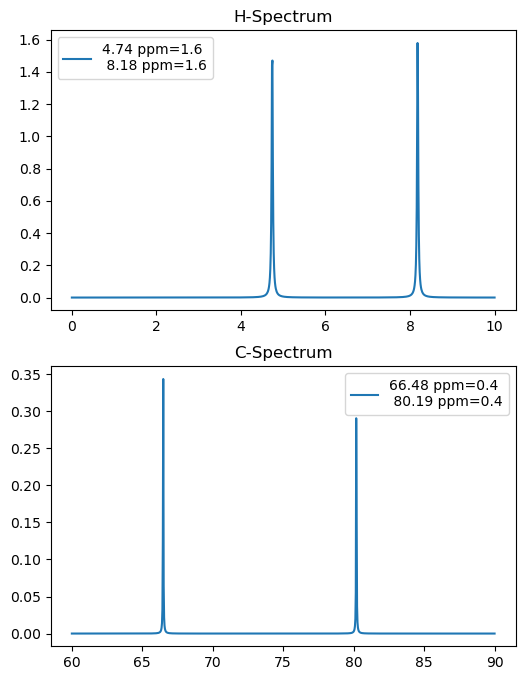

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(6,8))
cz.compile().evolve_pho_th().plot_h_spectrum(ax[0])
ax[0].set_title("H-Spectrum")
cz.compile().evolve_pho_th().plot_c_spectrum(ax[1])
ax[1].set_title("C-Spectrum")

### Part D: Two Qubit CNOT

In [16]:
ncx = PulseSequence("Near CNOT")\
    .add(Pulse("Sx(pi/2)", Sx, np.pi/2))\
    .add(Pulse("2IzSz(aka delay(1/2J))", IzSz, np.pi))\
    .add(Pulse("Sy(-pi/2)", Sy, -np.pi/2))

ncx.print_sequence()

print(f"Near CX multiplied by phase factor: ")
np.exp(-1j*np.pi/4)*ncx.compile().get_operator()

Near CNOT Pulse Sequence: Sx(pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2)Near CX multiplied by phase factor: 


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.-1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.-1.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]]

Text(0.5, 0.98, 'Near CNOT Spectrum thermal state')

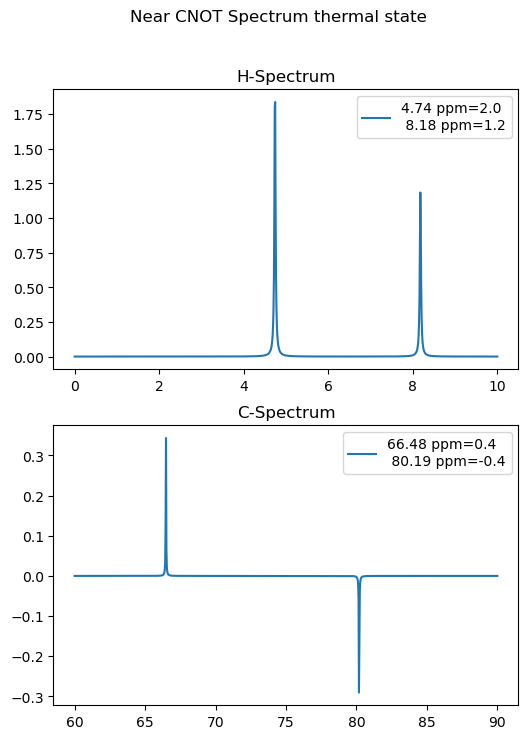

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(6,8))
ncx.compile().evolve_pho_th().plot_h_spectrum(ax[0])
ax[0].set_title("H-Spectrum")
ncx.compile().evolve_pho_th().plot_c_spectrum(ax[1])
ax[1].set_title("C-Spectrum")
plt.suptitle("Near CNOT Spectrum thermal state")

In [18]:

from simulator.Gate import pH_s, pH_s_dag
cx =  PulseSequence("CNOT")\
    .add(pH_s)\
    .add_seq(cz)\
    .add(pH_s_dag)

cx.print_sequence()
print("\n")

print("Actual CNOT multiplied by global phase")
np.exp(1j*5*np.pi/4)*cx.compile().get_operator()

CNOT Pulse Sequence: Sy(-pi/2) -> Ix(-pi/2) -> Iy(0.5*pi) -> Ix(pi/2) -> Sx(-pi/2) -> Sy(0.5*pi) -> Sx(pi/2) -> -2IzSz(aka delay(3/2J)) -> Sy(+pi/2)

Actual CNOT multiplied by global phase


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [19]:
51.67/39.78 

1.2988939165409754

In [20]:
4.21/3.46 

1.216763005780347

In [21]:
69.78/44.34 

1.5737483085250337

In [22]:
3.21/-4.56 

-0.7039473684210527

Text(0.5, 0.98, 'CNOT Spectrum thermal state')

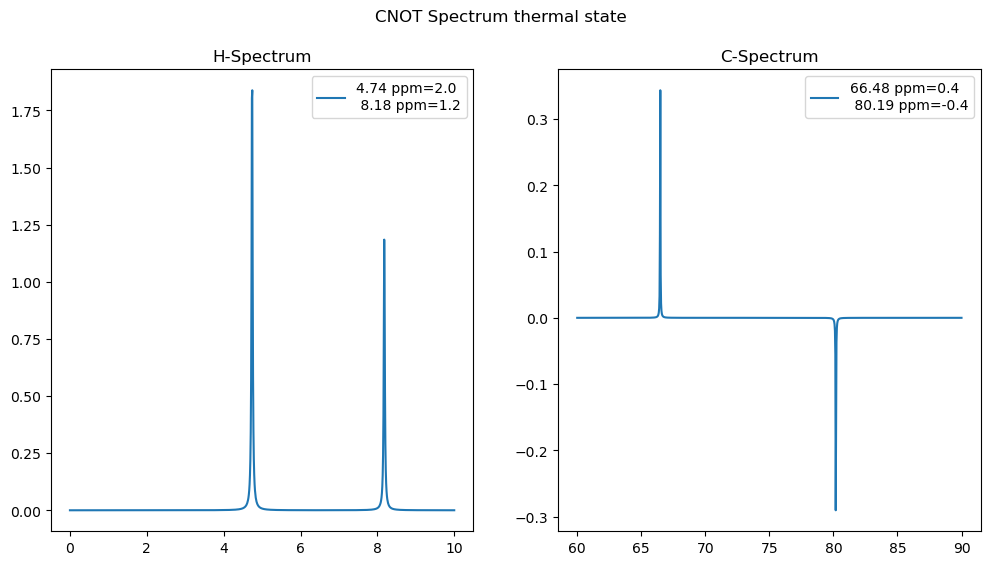

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
cx.compile().evolve_pho_th().plot_h_spectrum(ax[0])
ax[0].set_title("H-Spectrum")
cx.compile().evolve_pho_th().plot_c_spectrum(ax[1])
ax[1].set_title("C-Spectrum")
plt.suptitle("CNOT Spectrum thermal state")